**Problem : Sentiment Analysis of US Airline Tweets**

import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
data = pd.read_csv('Tweets.csv')

**Exploratory Data Analysi**s

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
data.shape

(14640, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
#Finding if there is any missing value

In [9]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Visualizations**

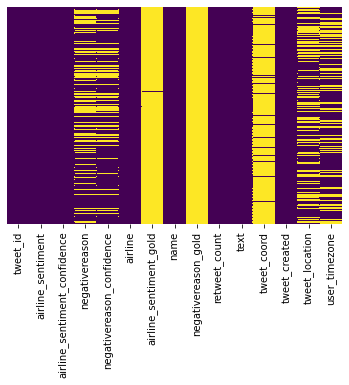

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

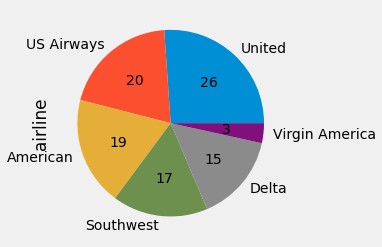

In [12]:
data.airline.value_counts().plot(kind='pie',autopct='%1.0f')

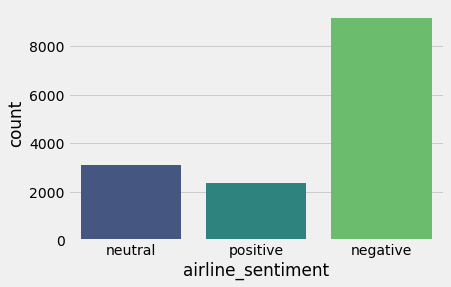

In [13]:
sns.countplot(x='airline_sentiment',data=data,palette='viridis')

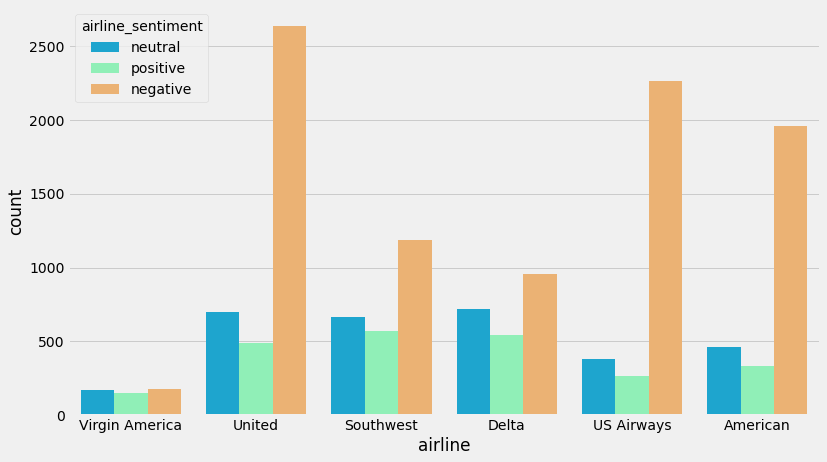

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(x='airline',hue='airline_sentiment',data=data,palette='rainbow')

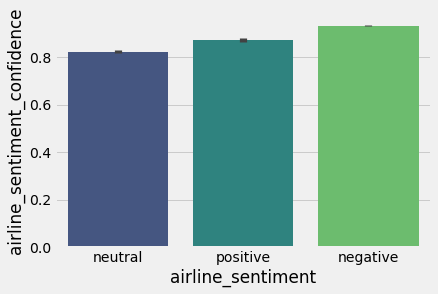

In [15]:
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=data,palette='viridis')

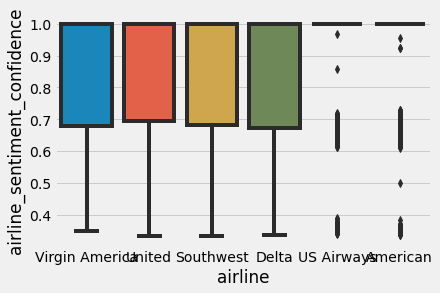

In [16]:
sns.boxplot(x='airline',y='airline_sentiment_confidence',data=data)

**Data Cleaning**

In [17]:
Features = data.iloc[:,10].values
Labels = data.iloc[:,1].values

In [18]:
processed_Features = []

for sentence in range(0,len(Features)):
    #remove all the special character
    processed_Feature = re.sub(r'\W',' ',str(Features[sentence]))

    #remove all single characters
    processed_Feature = re.sub(r'\s+[a-zA-Z]\s+',' ',processed_Feature)

    #remove single characters from the start
    processed_Feature = re.sub(r'\^[a-zA-Z]\s+',' ',processed_Feature)

    #substituting multiple spaces with single space
    processed_Feature = re.sub(r'\s+',' ',processed_Feature,flags=re.I)

    #Removing prefixed 'b'
    processed_Feature = re.sub(r'^b\s+', ' ',processed_Feature)

    #converrting into lowercase
    processed_Feature = processed_Feature.lower()
    processed_Features.append(processed_Feature)

In [19]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install --user -U nltk
import nltk
nltk.download('stopwords')

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
vectorizer = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_Features = vectorizer.fit_transform(processed_Features).toarray()

**Train-Test Split**

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(processed_Features,Labels,test_size=0.2,random_state=0)

In [22]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


**Build Classifification Models**

1. Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200,random_state=0)
text_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [24]:
predictions = text_classifier.predict(x_test)

In [25]:
predictions

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,predictions)
print(cm)

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]


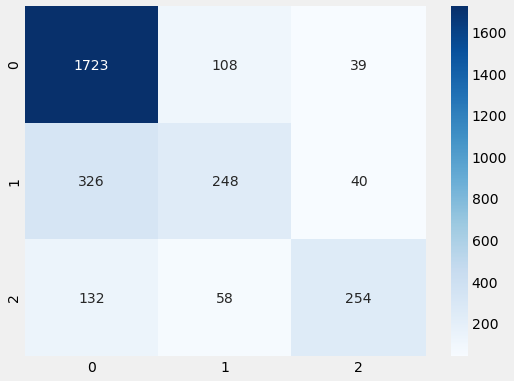

In [27]:
# plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')


In [28]:
print('accuracy score',accuracy_score(y_test,predictions))

accuracy score 0.7599043715846995


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



**2.Support Vector Machine**

In [30]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',random_state=1)
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predictions))

[[1697  129   44]
 [ 264  306   44]
 [ 107   56  281]]


In [32]:
print('accuracy score',accuracy_score(y_test,predictions))

accuracy score 0.7800546448087432


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1870
     neutral       0.62      0.50      0.55       614
    positive       0.76      0.63      0.69       444

    accuracy                           0.78      2928
   macro avg       0.74      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



**Naive Bayes Classifier**

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [35]:
predictions = classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predictions))

[[1823   40    7]
 [ 388  204   22]
 [ 213   38  193]]


In [37]:
print('accuracy score',accuracy_score(y_test,predictions))

accuracy score 0.7581967213114754


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      1870
     neutral       0.72      0.33      0.46       614
    positive       0.87      0.43      0.58       444

    accuracy                           0.76      2928
   macro avg       0.78      0.58      0.63      2928
weighted avg       0.76      0.76      0.73      2928



Based on the comparison and error analysis of 3 models such as Random Forest Classifier, Support Vector Machine and Naive Bayes Classifier, We can clearly see that Support Vector Machine(SVM) is the best among call.